Import dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
import pylab as pl

In [3]:
file_dtypes = {'Ticket number': str, 'Issue time': np.float64, 'Meter Id': str, 'Marked Time': str,
       'RP State Plate': str, 'Plate Expiry Date': str, 'VIN': str, 'Make': str, 'Body Style': str,
       'Color': str, 'Location': str, 'Route': str, 'Agency': np.float64, 'Violation code': str,
       'Violation Description': str, 'Fine amount': np.float32, 'Latitude': np.float32, 'Longitude': np.float32}

df_tc = pd.read_csv('data/parking_citations.corrupted.csv',
                    dtype=file_dtypes,
                    parse_dates=['Issue Date'],
                   index_col=['Ticket number'])

In [34]:
# print(df_tc)
df_tc.head(15)

,Unnamed: 0,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,0,1103341116,2015-12-21,1251.0,NaN,NaN,CA,200304.0,NaN,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.000
1,1,1103700150,2015-12-21,1435.0,NaN,NaN,CA,201512.0,NaN,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.000
2,2,1104803000,2015-12-21,2055.0,NaN,NaN,CA,201503.0,NaN,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439998.0,1802686.375
3,3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,NaN,NaN,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.0,1802686.250
4,4,1105461453,2015-09-15,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.000
5,5,1106226590,2015-09-15,19.0,NaN,NaN,CA,201507.0,NaN,NaN,VN,GY,SAN PEDRO S/O BOYD,1A35W,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.000
6,6,1106500452,2015-12-17,1710.0,NaN,NaN,CA,201605.0,NaN,MAZD,PA,BL,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,99999.0,99999.000
7,7,1106500463,2015-12-17,1710.0,NaN,NaN,CA,201602.0,NaN,NaN,PA,BK,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,99999.0,99999.000
8,8,1106506402,2015-12-22,945.0,NaN,NaN,CA,201605.0,NaN,NaN,PA,BR,721 S WESTLAKE,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.000
9,9,1106506413,2015-12-22,1100.0,NaN,NaN,CA,201701.0,NaN,NaN,PA,SI,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.000


In [5]:
df_tc.shape

(8726014, 20)

In [6]:
df_tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8726014 entries, 0 to 8726013
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Ticket number          object 
 2   Issue Date             object 
 3   Issue time             float64
 4   Meter Id               object 
 5   Marked Time            float64
 6   RP State Plate         object 
 7   Plate Expiry Date      float64
 8   VIN                    object 
 9   Make                   object 
 10  Body Style             object 
 11  Color                  object 
 12  Location               object 
 13  Route                  object 
 14  Agency                 float64
 15  Violation code         object 
 16  Violation Description  object 
 17  Fine amount            float64
 18  Latitude               float64
 19  Longitude              float64
dtypes: float64(7), int64(1), object(12)
memory usage: 1.3+ GB


In [24]:
df_tc.Make.value_counts()

TOYT    721411
HOND    491961
FORD    382695
NISS    311324
CHEV    297076
         ...  
CMDR         1
SATO         1
FRKT         1
DOOH         1
HOU          1
Name: Make, Length: 1477, dtype: int64

In [8]:
df_tc['RP State Plate'].value_counts()

CA    8127986
AZ      77649
TX      55337
NV      51944
FL      37924
       ...   
AS         16
NF         13
YU          8
|           2
ML          1
Name: RP State Plate, Length: 78, dtype: int64

In [9]:
df_tc['Issue Date'].value_counts()

2016-01-19T00:00:00    9830
2014-12-31T00:00:00    9605
2016-05-05T00:00:00    9366
2016-02-23T00:00:00    9339
2015-06-09T00:00:00    9275
                       ... 
2012-08-10T00:00:00       1
2014-04-20T00:00:00       1
2012-02-21T00:00:00       1
2014-06-08T00:00:00       1
2014-11-14T00:00:00       1
Name: Issue Date, Length: 1843, dtype: int64

In [10]:
df_tc['Body Style'].value_counts()

PA    7673976
PU     298897
VN     233505
TK     213271
CM     140263
       ...   
RH          1
DU          1
US          1
NH          1
JA          1
Name: Body Style, Length: 191, dtype: int64

In [11]:
df_tc['Violation Description'].value_counts()

NO PARK/STREET CLEAN    2530294
METER EXP.              1524589
RED ZONE                 646198
PREFERENTIAL PARKING     599200
DISPLAY OF TABS          535798
                         ...   
134200                        1
8813C                         1
5202C                         1
6444K                         1
52011                         1
Name: Violation Description, Length: 795, dtype: int64

<AxesSubplot:ylabel='Frequency'>

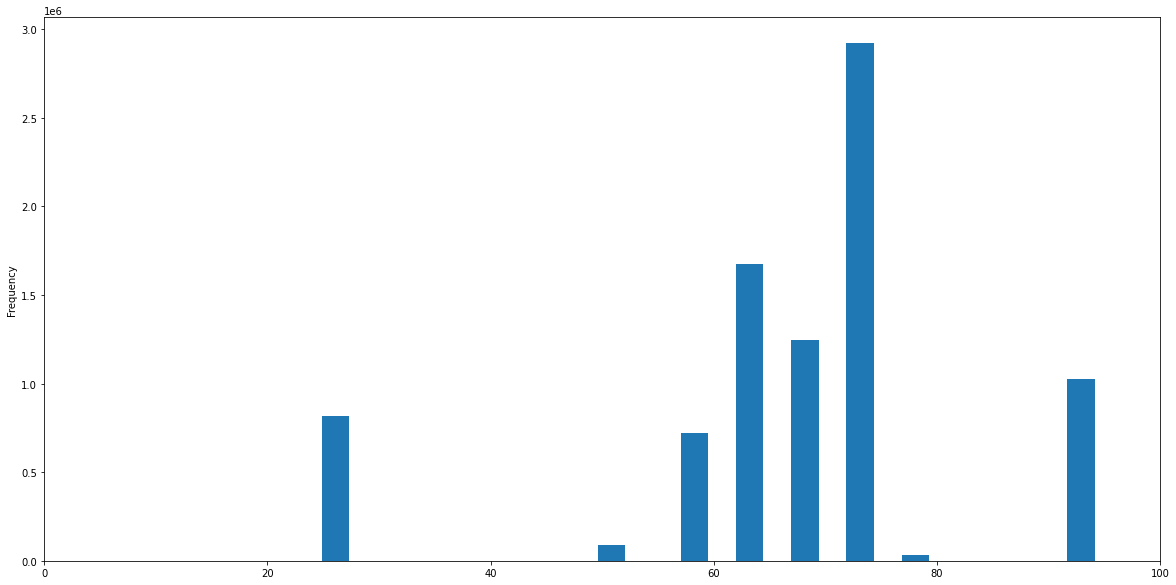

In [12]:
df_tc['Fine amount'].plot(kind="hist", bins=200, xlim=(0,100), figsize=(20,10))

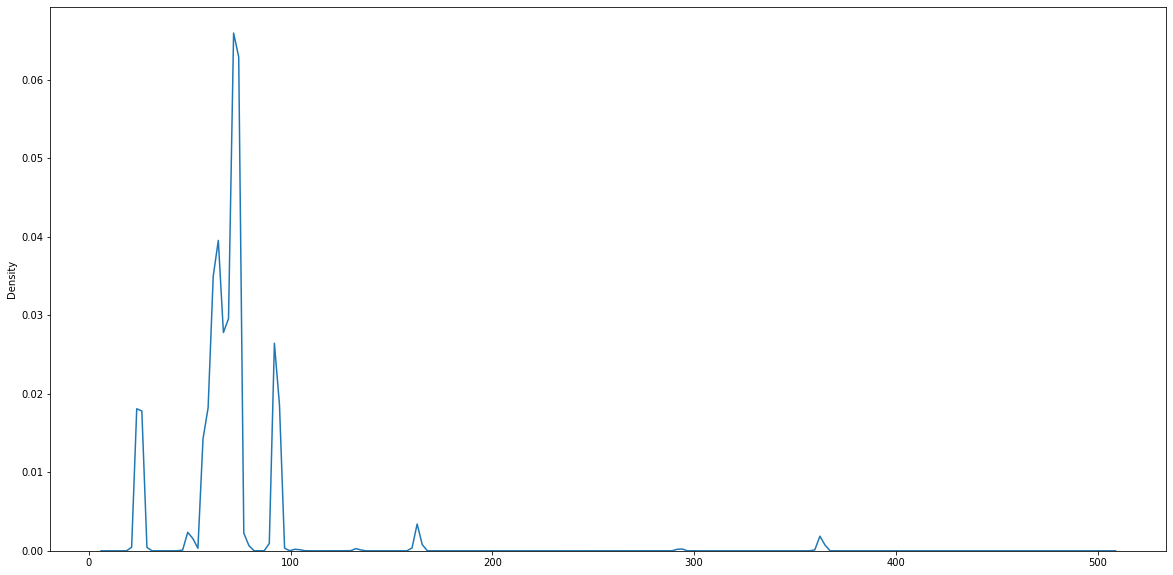

In [7]:
fine_arr = np.array(df_tc['Fine amount'].dropna())
fine_arr = np.sort(fine_arr)
# print(fine_arr)

# density = kde.gaussian_kde(fine_arr)
# y=density(fine_arr)

# plt.plot(fine_arr, y)

# sns.set(rc = {'figure.figsize':(15,8)})
# sns.displot(fine_arr,kde=True)
plt.figure(figsize=(20, 10))
sns.kdeplot(data=fine_arr)
plt.show()

In [13]:
df_tc['Fine amount'].value_counts()

73.0     2921569
63.0     1672550
68.0     1245160
93.0     1027851
25.0      818683
58.0      723588
163.0      99990
50.0       89410
363.0      59883
78.0       32156
293.0       9589
133.0       8734
103.0       7001
105.0        725
53.0         383
60.0         372
143.0        357
98.0         291
128.0        274
40.0         210
10.0         172
88.0         154
35.0         136
55.0          63
45.0          59
345.0         39
255.0         30
80.0          24
353.0         15
30.0           7
505.0          6
70.0           6
85.0           5
65.0           5
75.0           4
123.0          3
113.0          1
330.0          1
155.0          1
Name: Fine amount, dtype: int64

<AxesSubplot:>

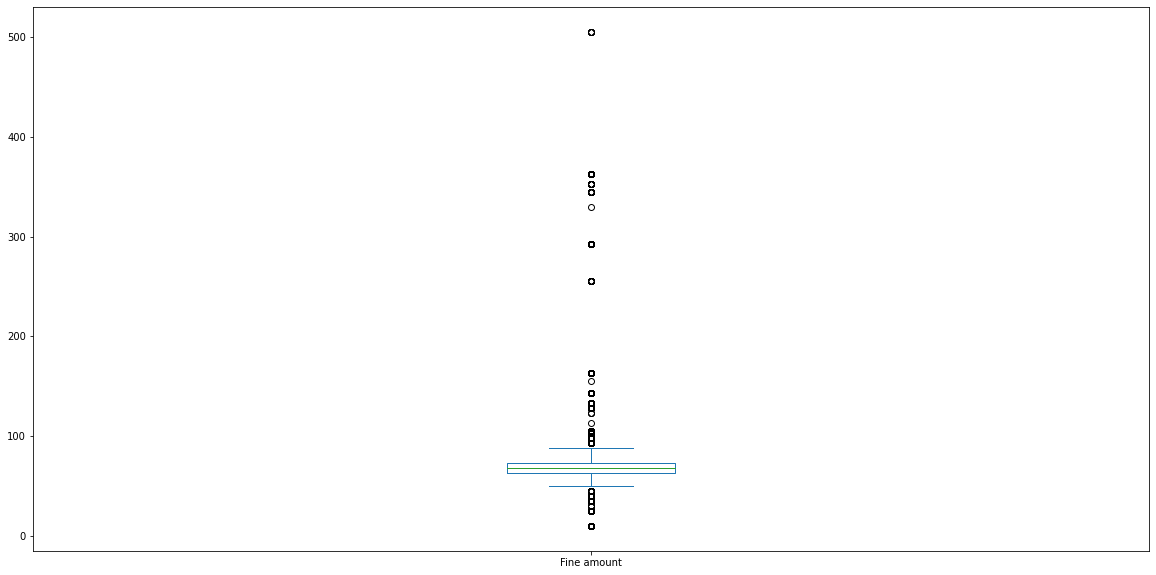

In [14]:
df_tc['Fine amount'].plot(kind="box", figsize=(20,10))

In [20]:
df_tc['Latitude'].value_counts()
df_tc['Latitude'].max()

4042322160.0

<AxesSubplot:>

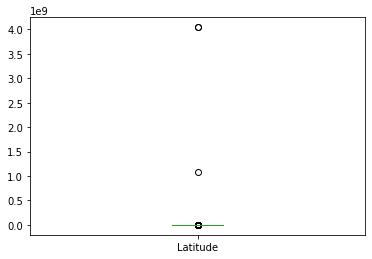

In [14]:
df_tc['Latitude'].plot(kind="box")

<AxesSubplot:>

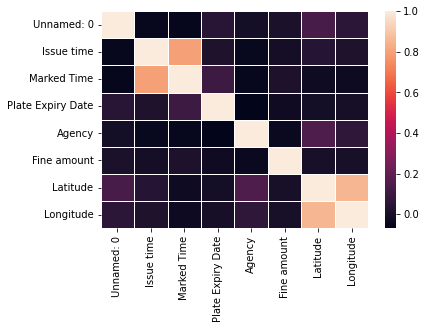

In [15]:
corr = df_tc.corr()
sns.heatmap(corr, linewidth=0.5)

In [16]:
df_tc.isna().any()

Unnamed: 0               False
Ticket number            False
Issue Date                True
Issue time                True
Meter Id                  True
Marked Time               True
RP State Plate            True
Plate Expiry Date         True
VIN                       True
Make                      True
Body Style                True
Color                     True
Location                  True
Route                     True
Agency                    True
Violation code           False
Violation Description     True
Fine amount               True
Latitude                  True
Longitude                 True
dtype: bool

In [10]:
df_tc.isna().sum()

Unnamed: 0                     0
Issue Date                   536
Issue time                  2583
RP State Plate               765
Plate Expiry Date         794827
Make                     4368470
Body Style                  8890
Color                       4115
Location                     854
Route                      65354
Agency                       545
Violation code                 0
Violation Description        872
Fine amount                 6507
Latitude                       3
Longitude                      3
dtype: int64

In [9]:
df_tc = df_tc.drop(columns=['Meter Id', 'Marked Time', 'VIN'])

In [12]:
df_tc_make_exists = df_tc.dropna(subset=['Make'])

In [13]:
df_tc_make_exists = df_tc_make_exists.loc[df_tc_make_exists['Latitude']!=99999]

In [14]:
df_tc_make_exists.head()

,Unnamed: 0,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
Ticket number,,,,,,,,,,,,,,,,
1109455266,43,2015-12-26,1815.0,NY,NaN,TOYO,PA,WH,3200 CANYON DR,NaN,36.0,8603,PK IN PROH AREA,68.0,6467477.0,1868721.00
1109811360,56,2015-12-26,2231.0,CA,201506.0,SCIO,SU,BK,1141 EAGLE VISTA DR,NaN,36.0,8603,PK IN PROH AREA,68.0,6504463.5,1874621.50
1109818625,58,2015-12-27,2235.0,CA,201601.0,CADI,PA,BK,2551 MOTOR AVE,NaN,34.0,6344K2,NO PK BET 1-3AM,68.0,6438048.0,1839690.75
1111259715,81,2015-12-26,1920.0,CA,201702.0,OLDS,NaN,BU,501 S VENICE BLVD,NaN,36.0,80714,PRIVATE PROPERTY,68.0,6420102.0,1817944.75
1111881573,82,2015-12-23,2150.0,CA,201606.0,BMW,SU,WH,380 WORLD WAY U/L,2F91,2.0,8939,WHITE CURB,58.0,6439920.0,1802686.75


In [23]:
df_tc_make_exists.isna().sum()

Unnamed: 0               0
Issue Date               0
Issue time               0
RP State Plate           0
Plate Expiry Date        0
Make                     0
Body Style               0
Color                    0
Location                 0
Route                    0
Agency                   0
Violation code           0
Violation Description    0
Fine amount              0
Latitude                 0
Longitude                0
dtype: int64

In [22]:
df_tc_make_exists = df_tc_make_exists.dropna()

In [24]:
df_tc_make_exists.shape

(3343449, 16)

In [25]:
df_top25_makes = df_tc_make_exists.Make.value_counts().head(25)
print(df_top25_makes)

TOYT    588404
HOND    388221
FORD    288480
NISS    240737
CHEV    222612
BMW     149805
MERZ    134826
VOLK    116310
HYUN    104970
LEXS     98686
DODG     95197
JEEP     78248
KIA      78023
AUDI     64059
MAZD     63261
OTHR     51054
GMC      43583
CHRY     43190
INFI     43117
ACUR     41684
SUBA     37367
VOLV     32149
MITS     29334
CADI     25106
MNNI     24852
Name: Make, dtype: int64


In [26]:
df_top25_makes.sum()

3083275

In [27]:
top25_arr = df_top25_makes.index.to_numpy()
print(top25_arr)

['TOYT' 'HOND' 'FORD' 'NISS' 'CHEV' 'BMW' 'MERZ' 'VOLK' 'HYUN' 'LEXS'
 'DODG' 'JEEP' 'KIA' 'AUDI' 'MAZD' 'OTHR' 'GMC' 'CHRY' 'INFI' 'ACUR'
 'SUBA' 'VOLV' 'MITS' 'CADI' 'MNNI']


In [28]:
df_tc_make_exists['Make_mod'] = np.where(df_tc_make_exists['Make'].isin(top25_arr), "TOP 25", "THE REST")
# df_tc_make_exists.loc[df_tc_make_exists['Make'].isin(top25_arr),'Make_mod'] = "TOP 25"
# df_tc_make_exists.loc[~df_tc_make_exists['Make'].isin(top25_arr),'Make_mod'] = "THE REST"
df_tc_make_exists.Make_mod.value_counts()

TOP 25      3083275
THE REST     260174
Name: Make_mod, dtype: int64

In [ ]:
# df_tc['Time'] = pd.to_datetime(df_tc['Issue time'],
#                               format="%H%M")